In [30]:
import plotly.express as px
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree 
from sklearn import preprocessing

In [13]:
DF = pd.read_csv('New_Data.csv')

DF = DF.drop('authentic',axis=1)

DF.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,title,review
0,2019-02-10,2,4,578,False,Recommended,Expansion - Hearts of Iron IV: Man the Guns,gt played as german reich gt declare war on b...
1,2019-02-07,0,0,892,False,Recommended,Expansion - Hearts of Iron IV: Man the Guns,very good game although a bit overpriced in my...
2,2018-06-14,126,1086,676,False,Recommended,Dead by Daylight,out of all the reviews i wrote this one is pro...
3,2017-06-20,85,2139,612,False,Recommended,Dead by Daylight,disclaimer i survivor main i play games for fu...
4,2016-12-12,4,55,2694,False,Recommended,Dead by Daylight,english after playing for more than two years ...


In [14]:
median_helpful = DF['helpful'].median()
median_hour = DF['hour_played'].median()
mean_hour = DF['hour_played'].mean()
print(median_helpful, median_hour, mean_hour)

0.0 187.0 360.54436069593123


In [15]:
authentic = [None]*len(DF)
for i in range(0, len(DF)):
    if DF.iloc[i,2] > median_helpful or DF.iloc[i,3] >= median_hour:
        authentic[i] = 'TRUE'
    else:
        authentic[i] = 'FALSE'

In [16]:
DF.insert(8, 'authentic', pd.DataFrame(authentic))

In [18]:
DF.groupby('authentic').count()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,title,review
authentic,,,,,,,,
FALSE,153193,153193,153193,153193,153193,153193,153193,153193
TRUE,182070,182070,182070,182070,182070,182070,182070,182070


In [48]:
fig = px.histogram(DF, x='recommendation',color="authentic", title = 'Distribution of Labels',
                   color_discrete_sequence=["lightgreen", "lightskyblue", "lightsalmon"])
#fig.show()
#fig.write_html("proposal_distribution of labels.html")

In [23]:
authentic_2 = [None]*len(DF)
for i in range(0, len(DF)):
    if DF.iloc[i,2] > median_helpful or DF.iloc[i,3] >= mean_hour:
        authentic_2[i] = 'TRUE'
    else:
        authentic_2[i] = 'FALSE'

In [25]:
DF.insert(9, 'authentic_2', pd.DataFrame(authentic_2))

In [26]:
DF.groupby('authentic_2').count()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,title,review,authentic
authentic_2,,,,,,,,,
FALSE,211888,211888,211888,211888,211888,211888,211888,211888,211888
TRUE,123375,123375,123375,123375,123375,123375,123375,123375,123375


In [49]:
fig = px.histogram(DF, x='recommendation',color="authentic_2", title = 'Distribution of Labels',
                   color_discrete_sequence=["lightgreen", "lightskyblue", "lightsalmon"])
#fig.show()
#fig.write_html("proposal_distribution of labels.html")

In [37]:
Train_auth,Test_auth = train_test_split(DF, test_size = 0.25, stratify=DF['authentic_2'], random_state = 580)

In [38]:
Tfidf_auth=TfidfVectorizer(
    input="content",
    lowercase=True, 
    stop_words = "english",max_features = 1000)
Train_DTM_auth = Tfidf_auth.fit_transform(Train_auth['review'])
Train_DTM_DF_auth=pd.DataFrame(Train_DTM_auth.toarray(),columns=Tfidf_auth.get_feature_names())

In [45]:
## Instantiate
MyDT_auth=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=20, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            class_weight=None)

MyDT_auth.fit(Train_DTM_DF_auth, Train_auth['authentic_2'])

feature_names = Train_DTM_DF_auth.columns
class_names = Train_auth['authentic_2'].unique()

In [46]:
Test_DTM_auth = Tfidf_auth.transform(Test_auth['review'])
Test_DTM_DF_auth=pd.DataFrame(Test_DTM_auth.toarray(),columns=Tfidf_auth.get_feature_names())
DT_pred_auth=MyDT_auth.predict(Test_DTM_DF_auth)


The confusion matrix is:
[[50158  2814]
 [27812  3032]]


0.6346043714803856

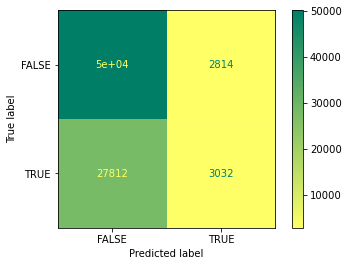

In [47]:
bn_matrix = confusion_matrix(Test_auth['authentic_2'], DT_pred_auth)
print("\nThe confusion matrix is:")
print(bn_matrix)
plot_confusion_matrix(MyDT_auth, Test_DTM_DF_auth, Test_auth['authentic_2'], cmap = 'summer_r')
#plt.savefig('MyTree1_cm.png')
accuracy_score(Test_auth['authentic_2'], DT_pred_auth)